<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Надежда, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если какие-то пакеты не используем, лучше их удалить. Например, здесь вижу импорты для масштабирования. В этой задаче можно обойтись без него, у нас данные примерно одного масштаба.
    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую. По аналогии:
    
`from sklearn.metrics import f1_score, roc_auc_score`
    
А если через запятую будет больше трех позиций, в таком случае здесь было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк. 

Такое оформление предпочтительнее:    
    
`from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score,
    roc_auc_score
)`
    
        
</div>


In [2]:
# Загрузим датасет
data=pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

#Выполним ресемплирование по 1 часу, перед этим отсортируем по индексу данные
data.sort_index(inplace=True)
data= data.resample('1H').sum()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Описание задачи есть, библиотеки загружены. Данные получены верно, даты обработаны, мы их переместили в индекс.  Ресемплирование провели верно. Отлично, что используем суммирование. Такой вариант интуитивно понятен и удобен. Полет нормальный :)
</div>
 

In [3]:
# Посмотрим на наши данные
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [5]:
# Посмотрим на пропуски и дубликаты
print(f'Пропуски --- {data.isna().sum()}','-'*10, f'Дубликаты --- {data.duplicated().sum()}', data.nunique(),'-'*10, 
      f' Процент дубликатов', round(data.nunique()/len(data)*100, 2), sep='\n', end='\n\n')

Пропуски --- num_orders    0
dtype: int64
----------
Дубликаты --- 4165
num_orders    251
dtype: int64
----------
 Процент дубликатов
num_orders    5.68
dtype: float64



Как мы видим, данных не так много, это дата и время заказа, и кол-во заказов. Пропусков нет, но есть дубликаты. Их почти 6%, но в нашем случае их нецелесообразно удалять, так как данные ресемплированы.

## Анализ

Проанализируем наши данные. Построим график,где увидим наши заказы

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Count')]

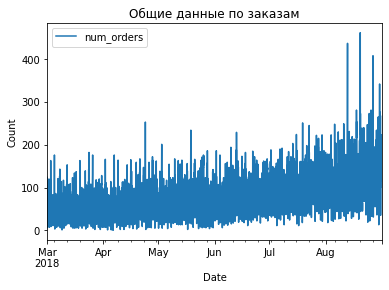

In [6]:
# Посмотрим на среднее значение и 
ax = data.plot(title='Общие данные по заказам')

ax.set(xlabel="Date", ylabel="Count")

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Графики в проекте нужно подписать.
       
</div> 
  


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Теперь все отлично.
</div>
 


<AxesSubplot:title={'center':'Увеличенный участок'}, xlabel='datetime'>

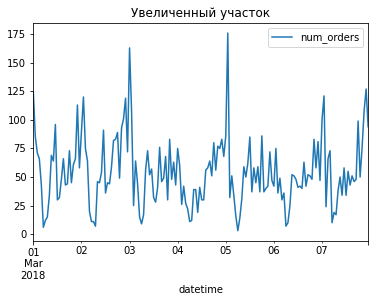

In [7]:
data.head(24*7).plot(title='Увеличенный участок')

In [8]:
# Проверим наши данные на стационарность
taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()

ts = taxi['num_orders']
st_test = adfuller(ts, regression='ctt')

# Если значение с индексом 1 меньше P-Value, заданное нами, то ряд стационарный
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')


Наш ряд стационарный


Наши данные в виде графика показывают стационарный ряд. Самих значений очень много, и обычную линейную зависимость трудно заметить. Также мы посмотрели данные по часам, к утру кол-во заказов увеличивается. Чтобы график был более понятен,посмотрим на его тренд и сезонность

 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По стационарности − тут не все так однозначно :)
    
Вот, например, статья про стационарность ряда: https://studopedia.ru/20_59693_statsionarnie-i-nestatsionarnie-ryadi.html Там говорится: «Стационарный ряд должен иметь постоянное среднее и должен колебаться вокруг этого среднего с постоянной дисперсией.»
    
Если посмотрим (ниже), то у нас ряд имеет и тренд, и непостоянную дисперсию. В строгом математическом смысле наш ряд не стационарен. 
    
ОДНАКО
    
В вопросе «шашечки или ехать» (без контекста темы проекта) нам важно не просто ответить на вопрос о стационарности ряда, а узнать, можем ли мы наш ряд предсказывать. Методами ML мы можем предсказать ряд, который не является стационарным, но может быть приводим к стационарному. В тренажере был пример с разностью ряда. Если возьмем наш ряд и вычтем из него его же, но со сдвигом на один час, то тренд исчезнет (можно попробовать). Это самое простое преобразование. И мы уже приблизились к математическому определению стационарности. Есть чуть более сложное предобразование Бокса-Кокса, которое и дисперсию делает однородной. 
    
Нам все эти преобразования делать не нужно, достаточно провести тест на стационарность ряда. Он, условно говоря, отвечает на вопрос «приводим ли ряд к стационарному» и, что важно для нас, можем ли мы построить эффективную модель.
    
Ниже приведу пример такого теста.
       
</div> 


In [9]:
# код ревьювера
from statsmodels.tsa.stattools import adfuller

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()

ts = taxi['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')



Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Спасибо большое за этот код! Выше я его применила.
       
</div> 


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Ага. Про стационарность такая неоднозначная тема :) Важно понимать, для чего она нам нужна, тогда можно не касаться терминологических споров.
</div>
 


In [10]:
decomposed_df = seasonal_decompose(data)

<AxesSubplot:title={'center':'Resid'}, xlabel='datetime'>

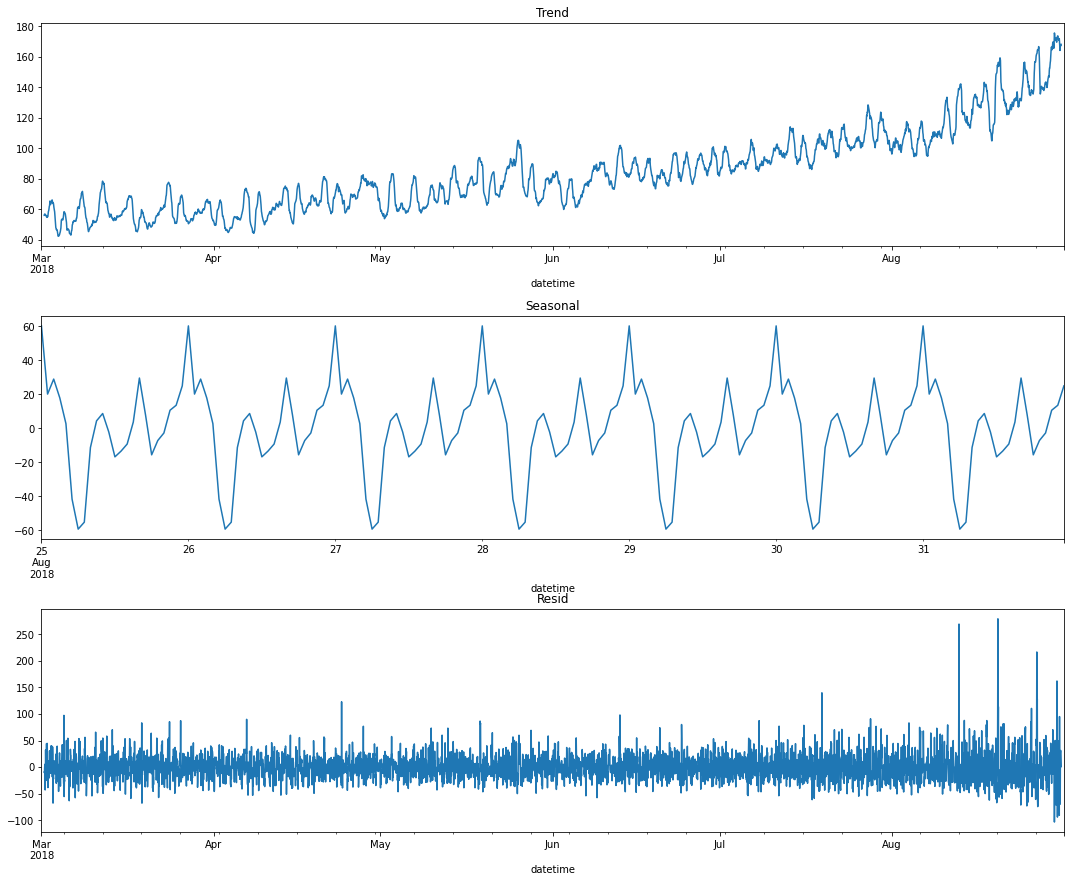

In [11]:
plt.figure(figsize=(15, 12))

plt.subplot(3,1,1)
plt.tight_layout()
decomposed_df.trend.plot(title='Trend')

plt.subplot(3,1,2)
plt.tight_layout()
decomposed_df.seasonal.tail(24*7).plot(title='Seasonal')

plt.subplot(3,1,3)
plt.tight_layout()
decomposed_df.resid.plot(title='Resid')

Можно заметить тренд на увеличение в летние месяцы. Это можно объяснить сезоном отпусков. Также, если смотреть на наши "остатки", можно увидеть невысокую долю остатков на всем протяжении. Значит, наша модель должна хорошо предсказывать. 

 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Можно. Точнее сказать «тренд на увеличение». А с августа, если присмотреться, там даже намечается некоторое ускорение. Правда, это может объясняться сезоном отпусков и повышенной загруженностью аэропортов.
    
Важно также прокомментировать третью составляющую декомпозиции ряда. По «остаткам» - это то, что мы не можем объяснить трендом и сезонностью, наше «случайное блуждание». Нужно посмотреть, на всем ли протяжении доля остатков одинаковая? Высокая ли она (тут сложно с первого раза, подскажу - не сильно высокая, модель будет неплохо все предсказывать). А вот если «остатков» к концу графика больше, значит в тестовую выборку попадет чуть больше данных, которые сложно объяснить и на которых модели будет сложнее предсказывать. Поэтому относительно большая (по сравнению с другими задачами машинного обучения) разница между метриками при обучении и исследовании, и между тестовой выборкой, не обязательно будет объясняться только переобучением модели.

      
</div> 
  


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Дополнила комментарий выше. Спасибо за объяснение!
       
</div> 


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Верно.
</div>

## Обучение

Создадим для обучения модели новые признаки, такие как день, месяц, год, день недели. Для этого напишем функцию, где добавим также отстающие значения и скользящее среднее. 

In [12]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    #Добавим отстающие значения
    for lag in range(1, max_lag+1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    #Добавим скользящее среднее    
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean() 
    
    

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Все ли признаки нам пригодятся? Можем ли «поймать» годовую сезонность?  У нас данные за какой период? Важен ли месяц и год?
    
И напротив, выше изучили данные и увидели, что суточная сезонность достаточно сильная. Здесь нам будет важно выделить признак часа.

</div>


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Исправила
</div> 


In [13]:
# Произвольно подберем параметры для нашей функции
make_features(data, 48, 21)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Неплохой выбор лагов и окна скользящего среднего. Можешь прокомментировать, почему именно такие показатели?
</div> 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
На самом деле, стыдно признаться, но я плохо поняла логику подбора. Но смею предположить, что лаги мы взяли за 48часов, т.е. 2 суток, чтобы правильно обработать выходные дни, а скользящее берем почти сутки, чтобы размыть всплески данных в рейсах( ночные/ дневные). Но я потом решила проверить, и у меня на 21 часе данные показали лучше, я и оставила. Но почитав твой комментарий ниже, по поводу лагов за неделю, решила попробовать 168. Время увеличилось, так что я оставила все как и было
</div> 


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Понял. Согласен, что время обучения увеличивается. Но нам в нашей задаче важнее подобрать фичи для модели, чем гиперпараметры :) Это будет эффективнее. Например, логистическая регрессия с 168 лагами работает и быстрее, и лучше по качеству, чем кэтбуст с 48 лагами.
</div>

In [14]:
# Разделим данные на выборки: тестовую и обучающую, согласно условию, тестовая составляет 10%. 
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

# Выделим признаки и целевой признак
target_train = train['num_orders']
target_test = test['num_orders']
features_train = train.drop(['num_orders'], axis=1)
features_test = test.drop(['num_orders'], axis=1)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Верно, ничего не перемешиваем.
</div>


Теперь можно перейти к обучению моделей. Выберем стандартные простые модели RandomForest и LinearRegression. А также выберем модели бустинга LGBMRegressor и CatBoost. Параметры будем подбирать методикой GridSearchCV. Так как в нашихданных нет категориальных признаков, то и нет смысла проводить кодировку. Наша задача вывести результат RMSE не больше 48.

In [15]:
# Напишем функцию для подсчета RMSE
def rmse(target, predicted):
    return mean_squared_error(target, predicted) ** 0.5

In [16]:
# Создадим функцию, которая сохранит результаты моделей
class ModelHelper:
    def __init__(self, name, model):
        self.name = name
        self.model = model
    
    def fit(self, features, target):        
        self.model.fit(features, target)
            
    def predict(self, features, target):          
        predicted = self.model.predict(features)   
        self.rmse = rmse(target, predicted)
    
    def getResult(self):
        return self.name, self.rmse
    
    
# Создадим переменную, где будут храниться результаты
result = []

# И создадим функцию для красивого вывода
def print_result(result):
    print('|{: >20}|{: >12}|'.format('Модель', 'RMSE'))
    for info in result:
        print('|{: >20}|{: >12.5f}|'.format(info[0], info[1]))    

**Модель Random Forest**

In [17]:
RMSE = 'neg_mean_squared_error'
tscv = TimeSeriesSplit(n_splits=10)
RANDOM = 12345

# Попробуем обучить случайный лес
parameters = {'n_estimators': range(5,11,5),'max_depth': range(1,8,3), 'min_samples_leaf': range(1,5,2),
              'min_samples_split': range(2,6,2)}

model = RandomForestRegressor(random_state=RANDOM)

grid = GridSearchCV(estimator= model, cv=tscv, param_grid = parameters, scoring=RMSE)
grid.fit(features_train, target_train)

grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

По кросс-валидации. Мы здесь используем обычную кросс-валидацию, которая, соответственно, предсказывает нам будущее только в одном из n_splits случае, а в остальных − прошлое.
    
В случае с временным рядом нам нужно задать кросс-валидацию TimeSeriesSplit
    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 
    
В случае временного ряда в каждом сплите тестовые индексы должны быть позже по времени, чем обучающие, поэтому перетасовка обычным способом неуместна. Как раз TimeSeriesSplit решает эту проблему.
    
Схематично работу можно представить вот так:\
</font>
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

А по реализации будет очень похоже на обычную кросс-валидацию:
```python
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X, y)
```


</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Исправила во всех моделях. Спасибо, я этого не знала.
</div> 

In [18]:
# Проверим наш случайный лес
model_forest = grid.best_estimator_
model_forest_helper = ModelHelper('Random forest', model_forest)
model_forest_helper.fit(features_train, target_train)
model_forest_helper.predict(features_train, target_train)
result.append(model_forest_helper.getResult())

**Модель LinearRegression**

In [19]:
model_lr = LinearRegression()
model_lr_helper = ModelHelper('Linear regression', model_lr)
model_lr_helper.fit(features_train, target_train)
model_lr_helper.predict(features_train, target_train)
result.append(model_lr_helper.getResult())

In [20]:
# Посмотрим на промежуточный результат
print_result(result)

|              Модель|        RMSE|
|       Random forest|    19.05913|
|   Linear regression|    23.44811|


Результат получился хороший, в лимит мы уложились. Теперь перейдем к моделям бустинга

**Модель LightGBM Regressor**

In [21]:
# Подберем параметры для модели
gbm = LGBMRegressor(boosting_type='gbdt', seed=RANDOM)
gbm_params = {'n_estimators': [20, 100], 'max_depth': [4,6]}

grid_gbm = GridSearchCV(estimator=gbm, param_grid= gbm_params, cv=tscv, scoring=RMSE)
grid_gbm.fit(features_train, target_train);

grid_gbm.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [22]:
# Обучим модель
model_gbm = grid_gbm.best_estimator_
model_gbm_helper = ModelHelper('LightGBM', model_gbm)
model_gbm_helper.fit(features_train, target_train)
model_gbm_helper.predict(features_train, target_train)
result.append(model_gbm_helper.getResult())

**Модель Cat Boost**

In [25]:
# Подберем параметры
cb = CatBoostRegressor(random_state=RANDOM , loss_function= 'RMSE')
cb_params = {'depth':[3, 15], 'iterations':[10, 50]}

grid_сb = GridSearchCV(cb, cb_params, cv=tscv, scoring=RMSE)
grid_сb.fit(features_train, target_train, verbose=10);

grid_сb.best_params_

Learning rate set to 0.5
0:	learn: 24.0275518	total: 48ms	remaining: 432ms
9:	learn: 16.2346098	total: 59.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 24.3777924	total: 2.14ms	remaining: 19.3ms
9:	learn: 17.4689809	total: 15.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 24.6539078	total: 2.39ms	remaining: 21.5ms
9:	learn: 18.2566645	total: 18.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 25.5062772	total: 2.21ms	remaining: 19.9ms
9:	learn: 19.0933065	total: 18.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 26.4127868	total: 2.44ms	remaining: 22ms
9:	learn: 19.4257708	total: 20.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 27.1277073	total: 2.49ms	remaining: 22.4ms
9:	learn: 20.1841901	total: 20.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 27.8462897	total: 2.72ms	remaining: 24.5ms
9:	learn: 20.7018619	total: 22.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 27.7079749	total: 2.69ms	remaining: 24.2ms
9:	learn: 21.1120687	total: 22.

{'depth': 3, 'iterations': 50}

 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
С учетом мощностей Яндекс.Практикума, тут многовато гиперпараметров, модель считается дооолго.
    
***

Можно убрать через logging_level = 'Silent' https://stackoverflow.com/questions/51111323/how-to-suppress-catboost-iteration-results
    
Будет чуть компактнее смотреться. Хотя вполне возможно, что логи нам интересны.
       
</div> 


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Я использовала logging_level = 'Silent', но мне кажется, он не сработал( выдавал ошибку)
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Хм, ок. Тогдак так оставим.
</div>

In [26]:
# Обучим модель
model_cb = grid_сb.best_estimator_
model_cb_helper = ModelHelper('Cat Boost', model_cb)
model_cb_helper.fit(features_train, target_train)
model_cb_helper.predict(features_train, target_train)
result.append(model_cb_helper.getResult())

Learning rate set to 0.5
0:	learn: 31.4408156	total: 5.44ms	remaining: 267ms
1:	learn: 28.1160627	total: 9.77ms	remaining: 234ms
2:	learn: 26.2589816	total: 13.9ms	remaining: 218ms
3:	learn: 25.3011546	total: 19ms	remaining: 219ms
4:	learn: 24.6907762	total: 22.8ms	remaining: 205ms
5:	learn: 24.5902093	total: 25.4ms	remaining: 187ms
6:	learn: 24.2752314	total: 28.2ms	remaining: 173ms
7:	learn: 24.1155132	total: 30.9ms	remaining: 162ms
8:	learn: 24.0494482	total: 34ms	remaining: 155ms
9:	learn: 23.9180580	total: 37.2ms	remaining: 149ms
10:	learn: 23.7130860	total: 40.3ms	remaining: 143ms
11:	learn: 23.5271357	total: 43.6ms	remaining: 138ms
12:	learn: 23.3588704	total: 46.6ms	remaining: 133ms
13:	learn: 23.2814012	total: 49.5ms	remaining: 127ms
14:	learn: 23.1697685	total: 52.5ms	remaining: 123ms
15:	learn: 23.0189578	total: 55.6ms	remaining: 118ms
16:	learn: 22.9376380	total: 58.6ms	remaining: 114ms
17:	learn: 22.8932860	total: 61.4ms	remaining: 109ms
18:	learn: 22.8747914	total: 64.2ms

In [27]:
# Посмотрим на наши результаты
print_result(result)

|              Модель|        RMSE|
|       Random forest|    19.05913|
|   Linear regression|    23.44811|
|            LightGBM|    16.94568|
|           Cat Boost|    19.77756|


**Вывод**. Все наши модели показали хорошие результаты, но модели бустинга в очередной раз лучше справляются с поставленной задачей, хоть и времени на обучение уходит чуть дольше.  

## Тестирование

Так как модель LightGBM показала самый лучший результат, то возьмем ее для тестирования

 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Полезно в текстовом комментарии оставлять также и гиперпараметры лучшей модели, когда берем ее на тест. Обычно в тесте прямо их не прописываем и из-за этого приходится их долго искать по всему проекту. Удобно где-то их пометить.    
       
</div> 


In [28]:
# Испытаем модель на тестовой выборке
# параметры лучшей модели {'max_depth': 4, 'n_estimators': 100}

model_gbm_test = grid_gbm.best_estimator_
model_gbm_helper_test = ModelHelper('LightGBM', model_gbm_test)
model_gbm_helper_test.fit(features_test, target_test)
model_gbm_helper_test.predict(features_test, target_test)
result.append(model_gbm_helper_test.getResult())

In [29]:
# Посмотрим на наши результаты
print_result(result)

|              Модель|        RMSE|
|       Random forest|    19.05913|
|   Linear regression|    23.44811|
|            LightGBM|    16.94568|
|           Cat Boost|    19.77756|
|            LightGBM|    14.14906|


In [30]:
# Проверим модель на адекватность
pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]

print(rmse(target_test,pred_previous))

58.856486242815066


Результат дамми модели больше, чем нашей тестовой, значит модель адекватна.

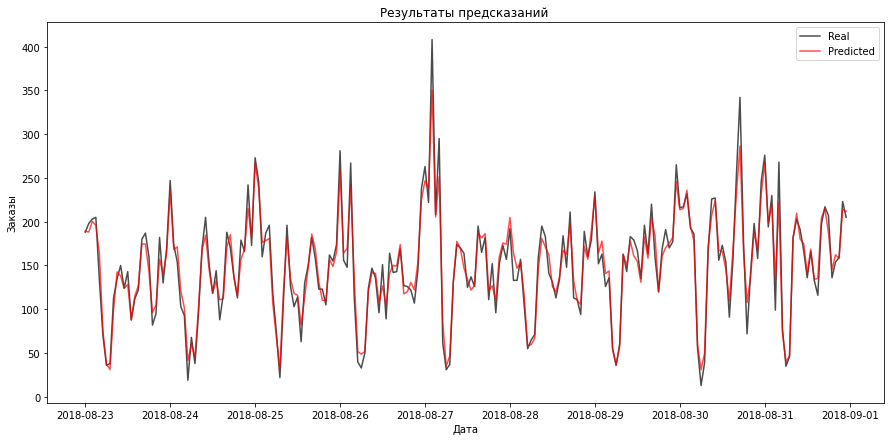

In [31]:
# Построим для наглядности график предсказаний и реальных данных
predicted = model_gbm_test.predict(features_test)
predicted=pd.DataFrame(predicted, index=features_test.index)


plt.figure(figsize=(15,7))
plt.plot(target_test['2018-08-23':], 
         color='black', 
         alpha=0.7)

plt.plot(predicted['2018-08-23':], 
         color='red', 
         alpha=0.7)

plt.title('Результаты предсказаний ')
plt.ylabel('Заказы')
plt.xlabel('Дата')
plt.legend(['Real', 'Predicted'])
plt.show()

**Вывод** Наша модель показала отличный результат, причем даже самые простые модели достигли нужных нам показателей. На графике видно,что реальные данные и предсказания почти совпадают, что являетс хорошим результатом.

   
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Более того, выше если бы мы серьезнее отнеслись к сезонностям, то могли взять 168 лагов (за всю неделю). И в таком случае наша линейная регрессия оказалась бы и лучшей по качеству, и лучшей по скорости (да, и по сравнению с ожидаемым качеством с 48 лагами результат бы вырос). Я пока сам результат не вижу, потому что не могу дождаться исполнения проекта. Но по коду все верно. Попробую все пересчитать локально при следующей проверке. 
</div>  
  


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь также можно было бы добавить проверку модели на адекватность. В случае с временными рядами модель будет предсказывать следующее значение предыдущим:


`pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]`

</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Спасибо большое тебе за замечания и советы. Надеюсь, я все исправила верно. Я тоже пыталась сделать локально, но у меня почему-то не было библиотеки с catboost. 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Можно установить через pip install  :)
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проверке**

У тебя получился хороший проект. Неплохой выбор моделей для обучения, достаточно подробная исследовательская часть. Однако есть и что доработать:

* Важно создать только нужные нам признаки. Час очень нужен, а год и месяц - надо бы подумать.
* Необходимо использовать схему обучения для задачи временных рядов - не перемешиваем сплиты и предсказываем только будущее.

**Желаю удачи и жду твой проект на повторное ревью!**😉

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48